In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')

## 📊 Basic Data Overview
Let's begin by exploring the dataset.

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Feature Correlation Heatmap')

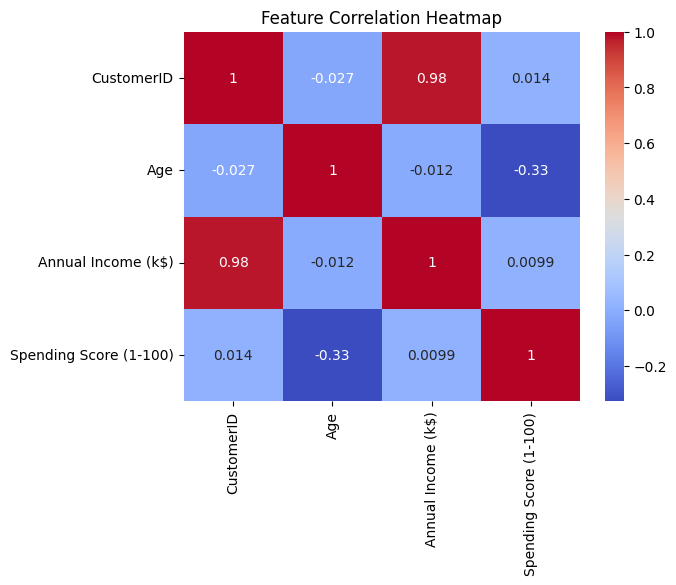

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')

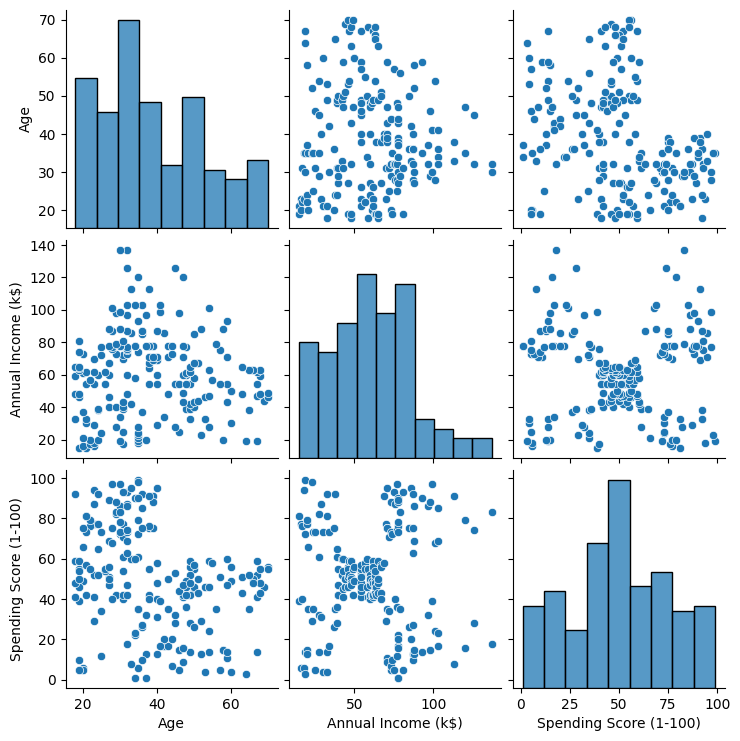

In [8]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

## 📌 Feature Selection
We'll use 'Annual Income' and 'Spending Score' for clustering.

In [9]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
x = df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


//You can split data using train_test_split

<Axes: title={'center': 'Unclustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

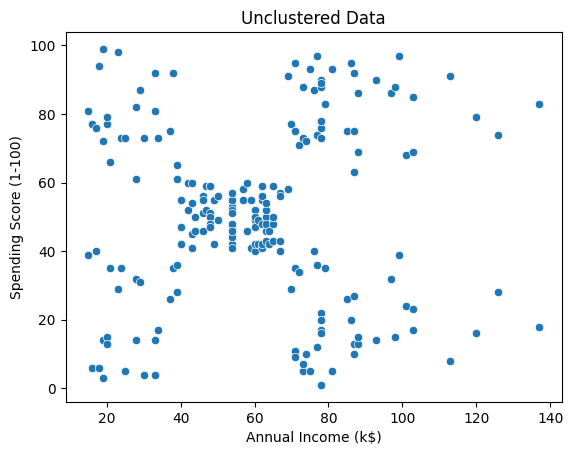

In [11]:
plt.title('Unclustered Data')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'])

In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering

AgglomerativeClustering is hierarchical Clustering

In [13]:
km = KMeans(n_clusters=4)

In [14]:
km.fit_predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 2, 2, 2,
       2, 2])

In [15]:
#sse
km.inertia_

100578.50371774727

In [16]:
sse =[]
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [17]:
sse

[269981.28,
 184800.8546049556,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 38858.9599751439,
 31248.853151807474,
 25321.077293451228,
 24160.966847041847,
 21210.693324120522,
 19065.93503844177,
 17025.345301140358,
 15013.609614946457,
 13050.484562928112,
 13668.687927663734]

Elbow Method

Text(0, 0.5, 'SSE')

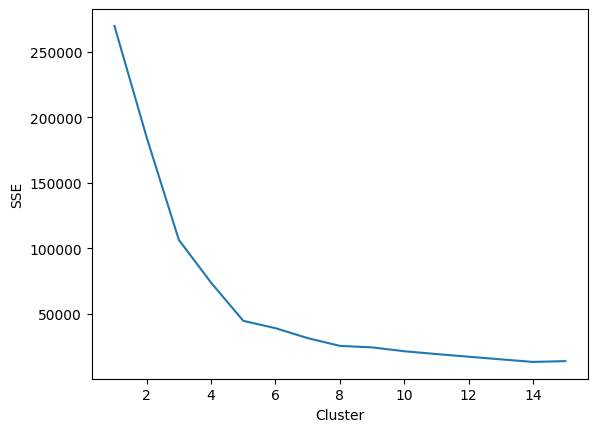

In [37]:
sns.lineplot(x=list(range(1, 16)), y=sse)
plt.xlabel('Cluster')
plt.ylabel('SSE')

So at 5th cluster 

In [20]:
#Method second or alternative for elbow method
from sklearn.metrics import silhouette_score

In [21]:
silh =[]
for k in range(2,16):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)

In [22]:
silh

[0.39465548731848604,
 0.46761358158775435,
 0.4937945814354117,
 0.5532176107575425,
 0.5428234160403222,
 0.45723561036659505,
 0.44297870691977637,
 0.45841513839373804,
 0.44228755609656917,
 0.4346537995901371,
 0.4235648219159377,
 0.4318947450990085,
 0.42032009099344736,
 0.42034156749914403]

Text(0, 0.5, 'Silhouette Score')

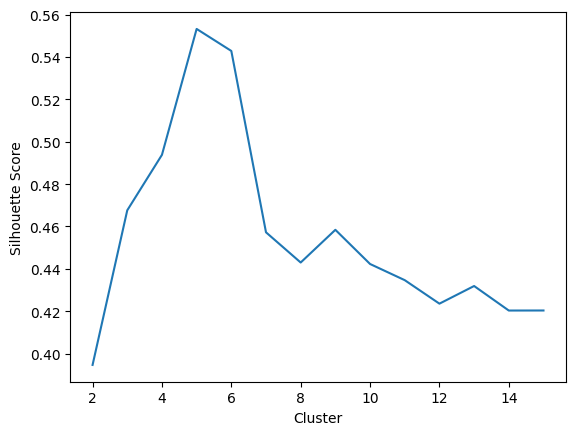

In [23]:
sns.lineplot(x=range(2,16), y=silh)
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')

<BarContainer object of 14 artists>

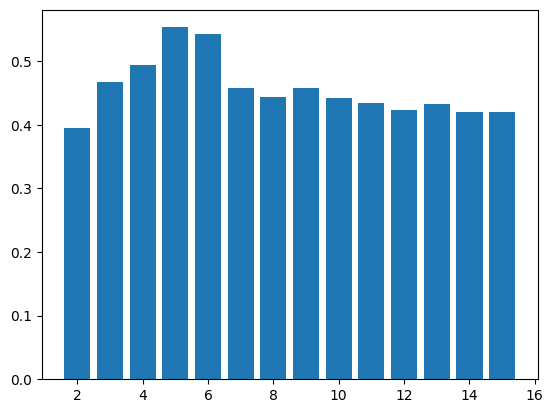

In [24]:
plt.bar(range(2,16,1),silh)

In [25]:
km = KMeans(n_clusters=5,random_state=1)

In [26]:
labels = km.fit_predict(x)

In [27]:
km.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [28]:
cent = km.cluster_centers_

<Axes: title={'center': 'Clustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

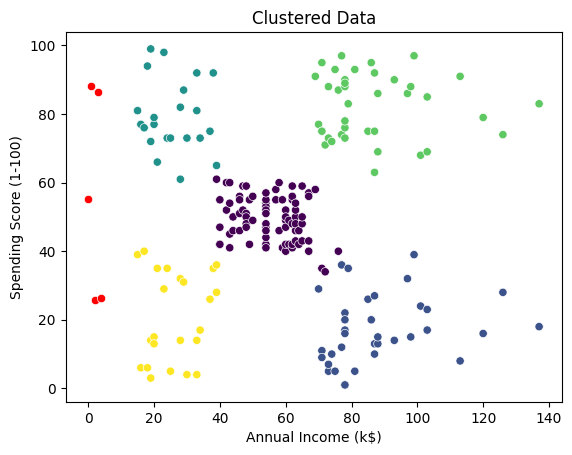

In [29]:
plt.title('Clustered Data')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels )
sns.scatterplot(cent[:,0], color='red')

In [30]:
df[labels==0]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
...,...,...,...,...,...
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35
132,133,Female,25,72,34


In [31]:
agl = AgglomerativeClustering(n_clusters=5)

In [32]:
alabels = agl.fit_predict(x)

In [33]:
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

<Axes: title={'center': 'KMEANS'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

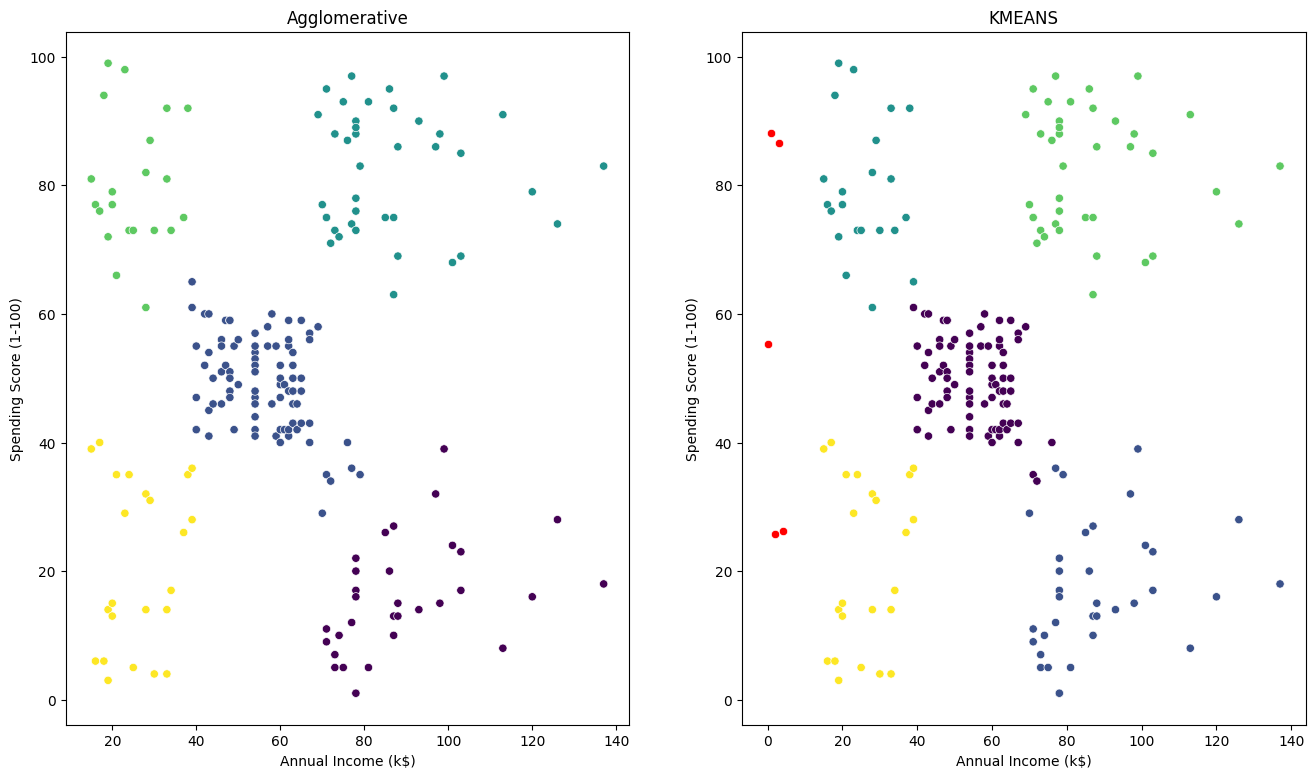

In [34]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Agglomerative')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'], c= alabels)

plt.subplot(1,2,2)
plt.title('KMEANS')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels )
sns.scatterplot(cent[:,0], color='red')

In [ ]:
# cluster 2,3,4,5

## 🧠 Cluster Insights
Let's analyze some statistics for each cluster.

In [35]:
df_clustered = df.copy()
df_clustered['Cluster'] = labels
df_clustered.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,25.272727,25.727273,79.363636
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043
